In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

12

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51250 stdev: 0.07844
Best fitness: 0.64935 - size: (2, 13) - species 7 - id 191
Average adjusted fitness: 0.179
Mean genetic distance 2.991, standard deviation 0.447
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.279 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55878 stdev: 0.06767
Best fitness: 0.66667 - size: (3, 15) - species 7 - id 323
Average adjusted fitness: 0.183
Mean genetic distance 3.061, standard deviation 0.462
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.287 sec (6.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56838 stdev: 0.06995
Best fitness: 0.66976 - size: (4, 16) - species 11 - id 524
Average adjusted fitness: 0.188
Mean genetic distance 3.059, standard deviation 0.459
Population of 204 members in 36 species
Total extincti

Mean genetic distance 3.230, standard deviation 0.485
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 8.247 sec (8.256 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59252 stdev: 0.08228
Best fitness: 0.70810 - size: (4, 17) - species 35 - id 1670
Average adjusted fitness: 0.206
Mean genetic distance 3.236, standard deviation 0.488
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.361 sec (8.235 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59131 stdev: 0.08108
Best fitness: 0.70810 - size: (4, 17) - species 35 - id 1670
Average adjusted fitness: 0.202
Mean genetic distance 3.220, standard deviation 0.496
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.541 sec (8.292 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59935 stdev: 0.07683
Best fitness: 0.70810 - size: (4, 17) - species 35 - id 1670


Mean genetic distance 3.154, standard deviation 0.527
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 8.500 sec (8.377 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66468 stdev: 0.09966
Best fitness: 0.81571 - size: (4, 18) - species 31 - id 1611
Average adjusted fitness: 0.284
Mean genetic distance 3.144, standard deviation 0.517
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.548 sec (8.366 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65630 stdev: 0.10448
Best fitness: 0.81571 - size: (4, 18) - species 31 - id 1611
Average adjusted fitness: 0.317
Mean genetic distance 3.197, standard deviation 0.520
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.189 sec (8.263 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65879 stdev: 0.10442
Best fitness: 0.81571 - size: (4, 18) - species 31 - id 1611


Mean genetic distance 3.033, standard deviation 0.488
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 7.787 sec (7.012 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64873 stdev: 0.10839
Best fitness: 0.76190 - size: (3, 15) - species 1 - id 1228
Average adjusted fitness: 0.339
Mean genetic distance 3.023, standard deviation 0.498
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.888 sec (7.122 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64085 stdev: 0.11150
Best fitness: 0.77675 - size: (4, 18) - species 6 - id 1365
Average adjusted fitness: 0.324
Mean genetic distance 3.037, standard deviation 0.493
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 9.373 sec (7.372 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64530 stdev: 0.10876
Best fitness: 0.77675 - size: (4, 18) - species 6 - id 1365
Averag

Mean genetic distance 3.243, standard deviation 0.561
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 8.751 sec (8.723 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64445 stdev: 0.12610
Best fitness: 0.80581 - size: (6, 23) - species 39 - id 3868
Average adjusted fitness: 0.342
Mean genetic distance 3.233, standard deviation 0.567
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.935 sec (8.783 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64621 stdev: 0.13251
Best fitness: 0.80581 - size: (6, 23) - species 39 - id 3868
Average adjusted fitness: 0.342
Mean genetic distance 3.235, standard deviation 0.565
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 9.330 sec (8.869 average)
number of class1:964
number of class2:653

 ****** Running generation 0 ****** 

Population's average fitness: 0.48742 stdev: 0.08785
Best fitness: 0.7210

Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.128 sec (8.112 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59988 stdev: 0.09417
Best fitness: 0.75325 - size: (5, 15) - species 20 - id 3220
Average adjusted fitness: 0.233
Mean genetic distance 3.172, standard deviation 0.526
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 8.309 sec (8.164 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59496 stdev: 0.09359
Best fitness: 0.75325 - size: (5, 15) - species 20 - id 3220
Average adjusted fitness: 0.240
Mean genetic distance 3.129, standard deviation 0.533
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 8.178 sec (8.168 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59676 stdev: 0.09201
Best fitness: 0.75387 - size: (8, 24) - species 20 - id 3846
Average adjusted fitness: 0.215
Mean genetic distance 

Mean genetic distance 3.236, standard deviation 0.457
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.016 sec (7.946 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59958 stdev: 0.08408
Best fitness: 0.73840 - size: (4, 17) - species 15 - id 1190
Average adjusted fitness: 0.271
Mean genetic distance 3.241, standard deviation 0.476
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 8.298 sec (8.042 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60754 stdev: 0.08076
Best fitness: 0.73840 - size: (4, 17) - species 15 - id 1190
Average adjusted fitness: 0.209
Mean genetic distance 3.259, standard deviation 0.453
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 8.349 sec (8.106 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61162 stdev: 0.07937
Best fitness: 0.73840 - size: (4, 17) - species 15 - id 1190


Mean genetic distance 3.079, standard deviation 0.517
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 7.270 sec (6.728 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59602 stdev: 0.08302
Best fitness: 0.75015 - size: (5, 20) - species 17 - id 722
Average adjusted fitness: 0.192
Mean genetic distance 3.098, standard deviation 0.513
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.448 sec (6.872 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60307 stdev: 0.08693
Best fitness: 0.75015 - size: (5, 20) - species 17 - id 722
Average adjusted fitness: 0.245
Mean genetic distance 3.138, standard deviation 0.506
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.666 sec (7.005 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61757 stdev: 0.08283
Best fitness: 0.75015 - size: (5, 20) - species 17 - id 722
Averag

Mean genetic distance 3.190, standard deviation 0.547
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 8.272 sec (8.351 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63834 stdev: 0.09631
Best fitness: 0.81262 - size: (7, 22) - species 11 - id 3258
Average adjusted fitness: 0.312
Mean genetic distance 3.206, standard deviation 0.551
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 8.505 sec (8.383 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62631 stdev: 0.10648
Best fitness: 0.81262 - size: (7, 22) - species 11 - id 3258
Average adjusted fitness: 0.270
Mean genetic distance 3.223, standard deviation 0.540
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.132 sec (8.485 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63267 stdev: 0.09642
Best fitness: 0.81262 - size: (7, 22) - species 11 - id 3258


Mean genetic distance 3.283, standard deviation 0.461
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 8.619 sec (8.422 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66861 stdev: 0.14438
Best fitness: 0.85343 - size: (8, 24) - species 25 - id 1969
Average adjusted fitness: 0.391
Mean genetic distance 3.283, standard deviation 0.470
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.189 sec (8.513 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69028 stdev: 0.11925
Best fitness: 0.85343 - size: (8, 24) - species 25 - id 1969
Average adjusted fitness: 0.408
Mean genetic distance 3.274, standard deviation 0.478
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.849 sec (8.602 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68550 stdev: 0.12887
Best fitness: 0.85343 - size: (8, 24) - species 25 - id 1969


Mean genetic distance 3.146, standard deviation 0.527
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.068 sec (7.239 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65116 stdev: 0.11087
Best fitness: 0.84848 - size: (4, 18) - species 5 - id 1688
Average adjusted fitness: 0.262
Mean genetic distance 3.207, standard deviation 0.519
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.215 sec (7.440 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65247 stdev: 0.10478
Best fitness: 0.84848 - size: (4, 18) - species 5 - id 1688
Average adjusted fitness: 0.200
Mean genetic distance 3.192, standard deviation 0.519
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.226 sec (7.606 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67137 stdev: 0.10263
Best fitness: 0.84848 - size: (4, 18) - species 5 - id 1688
Ave

Population's average fitness: 0.52946 stdev: 0.05169
Best fitness: 0.68336 - size: (3, 15) - species 1 - id 206
Average adjusted fitness: 0.105
Mean genetic distance 3.017, standard deviation 0.497
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.993 sec (6.607 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53491 stdev: 0.05979
Best fitness: 0.70996 - size: (3, 15) - species 7 - id 515
Average adjusted fitness: 0.154
Mean genetic distance 3.127, standard deviation 0.524
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.828 sec (6.681 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54981 stdev: 0.06246
Best fitness: 0.70996 - size: (3, 15) - species 7 - id 515
Average adjusted fitness: 0.117
Mean genetic distance 3.178, standard deviation 0.517
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.032 sec (6.768 average)

 ****** Running

Population's average fitness: 0.59249 stdev: 0.06942
Best fitness: 0.72665 - size: (4, 18) - species 7 - id 3160
Average adjusted fitness: 0.151
Mean genetic distance 3.192, standard deviation 0.510
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 9.222 sec (8.771 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58932 stdev: 0.06681
Best fitness: 0.72665 - size: (4, 18) - species 7 - id 3160
Average adjusted fitness: 0.152
Mean genetic distance 3.180, standard deviation 0.508
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.607 sec (8.929 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59421 stdev: 0.06785
Best fitness: 0.72665 - size: (4, 18) - species 7 - id 3160
Average adjusted fitness: 0.171
Mean genetic distance 3.175, standard deviation 0.508
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.226 sec (9.084 average)

 ****** R

Population's average fitness: 0.77746 stdev: 0.22510
Best fitness: 0.91899 - size: (3, 16) - species 9 - id 1757
Average adjusted fitness: 0.667
Mean genetic distance 3.027, standard deviation 0.487
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.977 sec (7.658 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.77106 stdev: 0.22802
Best fitness: 0.91899 - size: (3, 16) - species 9 - id 1757
Average adjusted fitness: 0.668
Mean genetic distance 3.050, standard deviation 0.505
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 7.664 sec (7.698 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.79337 stdev: 0.18808
Best fitness: 0.91899 - size: (3, 16) - species 9 - id 1757
Average adjusted fitness: 0.681
Mean genetic distance 3.087, standard deviation 0.504
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.608 sec (7.702 average)

 ****** Ru

Population's average fitness: 0.60241 stdev: 0.09762
Best fitness: 0.78664 - size: (4, 19) - species 30 - id 1231
Average adjusted fitness: 0.240
Mean genetic distance 3.157, standard deviation 0.504
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.623 sec (7.324 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60903 stdev: 0.09585
Best fitness: 0.78664 - size: (4, 19) - species 30 - id 1231
Average adjusted fitness: 0.243
Mean genetic distance 3.141, standard deviation 0.508
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.594 sec (7.354 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60569 stdev: 0.09576
Best fitness: 0.78664 - size: (4, 19) - species 30 - id 1231
Average adjusted fitness: 0.226
Mean genetic distance 3.159, standard deviation 0.505
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.499 sec (7.368 average)

 ****** R

Population's average fitness: 0.64703 stdev: 0.10561
Best fitness: 0.81323 - size: (5, 21) - species 30 - id 2645
Average adjusted fitness: 0.286
Mean genetic distance 3.311, standard deviation 0.513
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.526 sec (8.962 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65184 stdev: 0.10348
Best fitness: 0.81323 - size: (5, 21) - species 30 - id 2645
Average adjusted fitness: 0.313
Mean genetic distance 3.308, standard deviation 0.514
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.436 sec (9.056 average)
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.52249 stdev: 0.08710
Best fitness: 0.77242 - size: (2, 13) - species 1 - id 197
Average adjusted fitness: 0.210
Mean genetic distance 2.903, standard deviation 0.485
Population of 199 members in 22 species
Total extinctions: 0
Generation t

Population's average fitness: 0.66379 stdev: 0.09783
Best fitness: 0.80705 - size: (4, 16) - species 1 - id 2013
Average adjusted fitness: 0.330
Mean genetic distance 3.166, standard deviation 0.498
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 8.923 sec (8.757 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63821 stdev: 0.10684
Best fitness: 0.80705 - size: (4, 16) - species 1 - id 2013
Average adjusted fitness: 0.273
Mean genetic distance 3.174, standard deviation 0.508
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 8.972 sec (8.788 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64215 stdev: 0.11015
Best fitness: 0.80705 - size: (4, 16) - species 1 - id 2013
Average adjusted fitness: 0.280
Mean genetic distance 3.178, standard deviation 0.498
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 9.086 sec (8.858 average)

 ****** Ru

Population's average fitness: 0.59927 stdev: 0.07277
Best fitness: 0.73098 - size: (6, 18) - species 5 - id 1905
Average adjusted fitness: 0.236
Mean genetic distance 3.200, standard deviation 0.474
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 8.047 sec (8.146 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60145 stdev: 0.07402
Best fitness: 0.73098 - size: (6, 18) - species 5 - id 1905
Average adjusted fitness: 0.207
Mean genetic distance 3.225, standard deviation 0.474
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 8.346 sec (8.212 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59778 stdev: 0.07351
Best fitness: 0.73098 - size: (6, 18) - species 5 - id 1905
Average adjusted fitness: 0.235
Mean genetic distance 3.217, standard deviation 0.473
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 8.282 sec (8.276 average)

 ****** Ru

Population's average fitness: 0.67828 stdev: 0.18493
Best fitness: 0.85281 - size: (4, 17) - species 39 - id 764
Average adjusted fitness: 0.463
Mean genetic distance 3.184, standard deviation 0.490
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 7.822 sec (7.043 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70749 stdev: 0.16951
Best fitness: 0.88806 - size: (5, 19) - species 29 - id 934
Average adjusted fitness: 0.484
Mean genetic distance 3.150, standard deviation 0.470
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.044 sec (7.209 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69865 stdev: 0.18346
Best fitness: 0.88806 - size: (5, 19) - species 29 - id 934
Average adjusted fitness: 0.478
Mean genetic distance 3.139, standard deviation 0.462
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.508 sec (7.252 average)

 ****** Runn

Population's average fitness: 0.71318 stdev: 0.18899
Best fitness: 0.91156 - size: (8, 25) - species 41 - id 3480
Average adjusted fitness: 0.549
Mean genetic distance 3.134, standard deviation 0.507
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.865 sec (8.416 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73252 stdev: 0.17008
Best fitness: 0.91156 - size: (8, 25) - species 41 - id 3480
Average adjusted fitness: 0.530
Mean genetic distance 3.131, standard deviation 0.510
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 9.050 sec (8.505 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.71883 stdev: 0.17139
Best fitness: 0.91156 - size: (8, 25) - species 41 - id 3480
Average adjusted fitness: 0.508
Mean genetic distance 3.131, standard deviation 0.520
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.991 sec (8.577 average)

 ******

Population's average fitness: 0.59947 stdev: 0.06947
Best fitness: 0.71181 - size: (2, 13) - species 22 - id 184
Average adjusted fitness: 0.206
Mean genetic distance 3.224, standard deviation 0.493
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 8.839 sec (8.361 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60647 stdev: 0.06847
Best fitness: 0.72913 - size: (8, 24) - species 12 - id 2659
Average adjusted fitness: 0.164
Mean genetic distance 3.254, standard deviation 0.502
Population of 190 members in 41 species
Total extinctions: 0
Generation time: 8.663 sec (8.422 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61121 stdev: 0.07080
Best fitness: 0.72913 - size: (8, 24) - species 12 - id 2659
Average adjusted fitness: 0.270
Mean genetic distance 3.271, standard deviation 0.496
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.985 sec (8.410 average)

 ****** 

Population's average fitness: 0.67063 stdev: 0.10898
Best fitness: 0.78417 - size: (3, 16) - species 1 - id 920
Average adjusted fitness: 0.385
Mean genetic distance 3.015, standard deviation 0.483
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.039 sec (7.575 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65867 stdev: 0.12384
Best fitness: 0.78417 - size: (3, 16) - species 1 - id 920
Average adjusted fitness: 0.399
Mean genetic distance 3.033, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.144 sec (7.726 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66381 stdev: 0.11485
Best fitness: 0.80148 - size: (3, 16) - species 30 - id 1932
Average adjusted fitness: 0.366
Mean genetic distance 3.022, standard deviation 0.497
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.522 sec (7.860 average)

 ****** Run

Population's average fitness: 0.55183 stdev: 0.15087
Best fitness: 0.77304 - size: (2, 13) - species 4 - id 337
Average adjusted fitness: 0.253
Mean genetic distance 2.968, standard deviation 0.495
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 6.885 sec (6.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60182 stdev: 0.13629
Best fitness: 0.81509 - size: (3, 15) - species 24 - id 531
Average adjusted fitness: 0.380
Mean genetic distance 2.956, standard deviation 0.499
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.801 sec (6.586 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60435 stdev: 0.15193
Best fitness: 0.81509 - size: (3, 15) - species 24 - id 531
Average adjusted fitness: 0.385
Mean genetic distance 2.968, standard deviation 0.493
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.002 sec (6.690 average)

 ****** Runni

Population's average fitness: 0.67121 stdev: 0.14328
Best fitness: 0.83302 - size: (8, 26) - species 23 - id 3373
Average adjusted fitness: 0.364
Mean genetic distance 3.273, standard deviation 0.483
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 8.969 sec (9.094 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67642 stdev: 0.13550
Best fitness: 0.83302 - size: (8, 26) - species 23 - id 3373
Average adjusted fitness: 0.372
Mean genetic distance 3.268, standard deviation 0.488
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.537 sec (9.186 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66493 stdev: 0.15106
Best fitness: 0.83302 - size: (8, 26) - species 23 - id 3373
Average adjusted fitness: 0.410
Mean genetic distance 3.247, standard deviation 0.487
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.529 sec (9.269 average)

 ******

Population's average fitness: 0.63966 stdev: 0.09708
Best fitness: 0.81262 - size: (6, 20) - species 11 - id 2095
Average adjusted fitness: 0.248
Mean genetic distance 3.252, standard deviation 0.522
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.951 sec (7.876 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64099 stdev: 0.09525
Best fitness: 0.81262 - size: (6, 20) - species 11 - id 2095
Average adjusted fitness: 0.254
Mean genetic distance 3.263, standard deviation 0.518
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.565 sec (7.981 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63427 stdev: 0.10519
Best fitness: 0.81262 - size: (6, 20) - species 11 - id 2095
Average adjusted fitness: 0.365
Mean genetic distance 3.286, standard deviation 0.498
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.197 sec (8.035 average)

 ******

Population's average fitness: 0.80960 stdev: 0.19142
Best fitness: 0.94620 - size: (2, 16) - species 16 - id 1231
Average adjusted fitness: 0.682
Mean genetic distance 3.127, standard deviation 0.494
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.378 sec (7.146 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.76284 stdev: 0.24111
Best fitness: 0.94620 - size: (2, 16) - species 16 - id 1231
Average adjusted fitness: 0.649
Mean genetic distance 3.137, standard deviation 0.502
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.061 sec (7.247 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.78104 stdev: 0.22093
Best fitness: 0.94991 - size: (6, 21) - species 33 - id 1504
Average adjusted fitness: 0.691
Mean genetic distance 3.141, standard deviation 0.492
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.092 sec (7.332 average)

 ****** R

Population's average fitness: 0.74055 stdev: 0.26367
Best fitness: 0.96166 - size: (7, 21) - species 29 - id 3814
Average adjusted fitness: 0.617
Mean genetic distance 3.237, standard deviation 0.552
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 8.924 sec (9.480 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75970 stdev: 0.25511
Best fitness: 0.96166 - size: (7, 21) - species 29 - id 3814
Average adjusted fitness: 0.653
Mean genetic distance 3.264, standard deviation 0.562
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 9.499 sec (9.571 average)
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.48460 stdev: 0.08603
Best fitness: 0.65306 - size: (2, 13) - species 1 - id 11
Average adjusted fitness: 0.192
Mean genetic distance 2.982, standard deviation 0.501
Population of 199 members in 27 species
Total extinctions: 0
Generation ti

Population's average fitness: 0.60839 stdev: 0.09437
Best fitness: 0.75325 - size: (6, 22) - species 16 - id 2805
Average adjusted fitness: 0.263
Mean genetic distance 3.314, standard deviation 0.503
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 8.569 sec (8.453 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61817 stdev: 0.09068
Best fitness: 0.75325 - size: (6, 22) - species 16 - id 2805
Average adjusted fitness: 0.218
Mean genetic distance 3.311, standard deviation 0.495
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 8.413 sec (8.471 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61948 stdev: 0.08969
Best fitness: 0.75325 - size: (6, 22) - species 16 - id 2805
Average adjusted fitness: 0.259
Mean genetic distance 3.322, standard deviation 0.490
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.662 sec (8.504 average)

 ******

Population's average fitness: 0.58999 stdev: 0.07775
Best fitness: 0.83921 - size: (4, 17) - species 2 - id 1860
Average adjusted fitness: 0.208
Mean genetic distance 3.190, standard deviation 0.502
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.528 sec (7.280 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59454 stdev: 0.07819
Best fitness: 0.83921 - size: (4, 17) - species 2 - id 1860
Average adjusted fitness: 0.186
Mean genetic distance 3.209, standard deviation 0.500
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.340 sec (7.305 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60111 stdev: 0.07690
Best fitness: 0.83921 - size: (4, 17) - species 2 - id 1860
Average adjusted fitness: 0.182
Mean genetic distance 3.218, standard deviation 0.505
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.714 sec (7.364 average)

 ****** Ru

Population's average fitness: 0.58902 stdev: 0.08929
Best fitness: 0.74583 - size: (2, 13) - species 6 - id 199
Average adjusted fitness: 0.261
Mean genetic distance 3.121, standard deviation 0.478
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 7.143 sec (6.377 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59592 stdev: 0.09630
Best fitness: 0.74583 - size: (2, 13) - species 6 - id 199
Average adjusted fitness: 0.274
Mean genetic distance 3.143, standard deviation 0.478
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 7.310 sec (6.533 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60512 stdev: 0.08973
Best fitness: 0.74583 - size: (2, 13) - species 6 - id 199
Average adjusted fitness: 0.210
Mean genetic distance 3.158, standard deviation 0.479
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 7.463 sec (6.666 average)

 ****** Running

Population's average fitness: 0.65181 stdev: 0.09540
Best fitness: 0.80952 - size: (8, 23) - species 33 - id 2434
Average adjusted fitness: 0.320
Mean genetic distance 3.244, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.265 sec (8.389 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64706 stdev: 0.10500
Best fitness: 0.80952 - size: (8, 23) - species 33 - id 2434
Average adjusted fitness: 0.326
Mean genetic distance 3.246, standard deviation 0.481
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.627 sec (8.423 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65130 stdev: 0.10393
Best fitness: 0.81880 - size: (8, 24) - species 33 - id 3996
Average adjusted fitness: 0.362
Mean genetic distance 3.284, standard deviation 0.487
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.611 sec (8.487 average)

 ******

Population's average fitness: 0.63601 stdev: 0.10616
Best fitness: 0.79839 - size: (8, 23) - species 31 - id 2643
Average adjusted fitness: 0.249
Mean genetic distance 3.160, standard deviation 0.508
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 8.057 sec (8.088 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63678 stdev: 0.10589
Best fitness: 0.79839 - size: (8, 23) - species 31 - id 2643
Average adjusted fitness: 0.276
Mean genetic distance 3.157, standard deviation 0.501
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.193 sec (8.134 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63114 stdev: 0.11353
Best fitness: 0.79839 - size: (8, 23) - species 31 - id 2643
Average adjusted fitness: 0.239
Mean genetic distance 3.176, standard deviation 0.503
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.451 sec (8.196 average)

 ******

Population's average fitness: 0.79459 stdev: 0.20700
Best fitness: 0.94929 - size: (3, 15) - species 16 - id 296
Average adjusted fitness: 0.668
Mean genetic distance 3.112, standard deviation 0.477
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.908 sec (6.821 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.77483 stdev: 0.23776
Best fitness: 0.94929 - size: (3, 15) - species 16 - id 296
Average adjusted fitness: 0.663
Mean genetic distance 3.113, standard deviation 0.473
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 7.415 sec (6.941 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.78469 stdev: 0.21841
Best fitness: 0.94929 - size: (3, 15) - species 16 - id 296
Average adjusted fitness: 0.663
Mean genetic distance 3.133, standard deviation 0.465
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.521 sec (7.038 average)

 ****** Ru

Population's average fitness: 0.59544 stdev: 0.15331
Best fitness: 0.78850 - size: (3, 15) - species 1 - id 356
Average adjusted fitness: 0.308
Mean genetic distance 2.950, standard deviation 0.463
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 5.831 sec (5.729 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64859 stdev: 0.12015
Best fitness: 0.79963 - size: (2, 14) - species 14 - id 494
Average adjusted fitness: 0.413
Mean genetic distance 2.943, standard deviation 0.509
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 6.083 sec (5.847 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63627 stdev: 0.13519
Best fitness: 0.79963 - size: (2, 14) - species 14 - id 494
Average adjusted fitness: 0.402
Mean genetic distance 2.951, standard deviation 0.497
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 6.994 sec (6.134 average)

 ****** Runni

Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.980 sec (7.825 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70137 stdev: 0.11863
Best fitness: 0.84416 - size: (7, 21) - species 26 - id 2489
Average adjusted fitness: 0.414
Mean genetic distance 3.277, standard deviation 0.521
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.894 sec (7.880 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70885 stdev: 0.12058
Best fitness: 0.84416 - size: (7, 21) - species 26 - id 2489
Average adjusted fitness: 0.452
Mean genetic distance 3.260, standard deviation 0.534
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.030 sec (7.911 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68996 stdev: 0.14025
Best fitness: 0.84416 - size: (7, 21) - species 26 - id 2489
Average adjusted fitness: 0.398
Mean genetic distance 

Mean genetic distance 3.200, standard deviation 0.489
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.823 sec (7.371 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67856 stdev: 0.10695
Best fitness: 0.81076 - size: (6, 20) - species 27 - id 1648
Average adjusted fitness: 0.430
Mean genetic distance 3.221, standard deviation 0.494
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 7.209 sec (7.381 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66376 stdev: 0.12966
Best fitness: 0.81076 - size: (6, 20) - species 27 - id 1648
Average adjusted fitness: 0.356
Mean genetic distance 3.233, standard deviation 0.490
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.287 sec (7.407 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64877 stdev: 0.14637
Best fitness: 0.82004 - size: (8, 24) - species 30 - id 2600


Mean genetic distance 3.090, standard deviation 0.478
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.050 sec (6.484 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60076 stdev: 0.09229
Best fitness: 0.75572 - size: (4, 16) - species 13 - id 680
Average adjusted fitness: 0.278
Mean genetic distance 3.148, standard deviation 0.482
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.028 sec (6.544 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59538 stdev: 0.10157
Best fitness: 0.75572 - size: (4, 16) - species 13 - id 680
Average adjusted fitness: 0.230
Mean genetic distance 3.193, standard deviation 0.495
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.198 sec (6.610 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61135 stdev: 0.08952
Best fitness: 0.75572 - size: (4, 16) - species 13 - id 680
Avera

Mean genetic distance 3.226, standard deviation 0.481
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.152 sec (8.635 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64183 stdev: 0.10269
Best fitness: 0.78726 - size: (7, 24) - species 7 - id 3991
Average adjusted fitness: 0.276
Mean genetic distance 3.203, standard deviation 0.490
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.120 sec (8.749 average)
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52676 stdev: 0.08732
Best fitness: 0.70439 - size: (2, 13) - species 5 - id 143
Average adjusted fitness: 0.260
Mean genetic distance 2.946, standard deviation 0.496
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.593 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55323 stdev: 0.09176
Best fitness: 0.71552 - size: (2, 12) - 

Mean genetic distance 3.197, standard deviation 0.537
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 7.591 sec (7.605 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63190 stdev: 0.09230
Best fitness: 0.76623 - size: (4, 17) - species 40 - id 1329
Average adjusted fitness: 0.266
Mean genetic distance 3.222, standard deviation 0.538
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 7.807 sec (7.662 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62920 stdev: 0.09495
Best fitness: 0.76623 - size: (4, 17) - species 40 - id 1329
Average adjusted fitness: 0.362
Mean genetic distance 3.236, standard deviation 0.556
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 7.968 sec (7.728 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62064 stdev: 0.09959
Best fitness: 0.76623 - size: (4, 17) - species 40 - id 1329


Mean genetic distance 3.205, standard deviation 0.493
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.819 sec (7.346 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62344 stdev: 0.10071
Best fitness: 0.80519 - size: (6, 22) - species 18 - id 2091
Average adjusted fitness: 0.278
Mean genetic distance 3.210, standard deviation 0.490
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.662 sec (7.445 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63081 stdev: 0.09925
Best fitness: 0.80519 - size: (6, 22) - species 18 - id 2091
Average adjusted fitness: 0.236
Mean genetic distance 3.227, standard deviation 0.488
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.684 sec (7.514 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63865 stdev: 0.09623
Best fitness: 0.80519 - size: (6, 22) - species 18 - id 2091


Mean genetic distance 3.071, standard deviation 0.497
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.931 sec (6.304 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71390 stdev: 0.16611
Best fitness: 0.86704 - size: (4, 16) - species 2 - id 843
Average adjusted fitness: 0.521
Mean genetic distance 3.061, standard deviation 0.507
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 6.945 sec (6.411 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.72825 stdev: 0.14942
Best fitness: 0.86704 - size: (4, 16) - species 29 - id 843
Average adjusted fitness: 0.533
Mean genetic distance 3.039, standard deviation 0.502
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 7.366 sec (6.547 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73334 stdev: 0.14502
Best fitness: 0.86704 - size: (4, 16) - species 29 - id 843
Average


Population's average fitness: 0.71857 stdev: 0.17630
Best fitness: 0.87570 - size: (6, 24) - species 35 - id 2621
Average adjusted fitness: 0.521
Mean genetic distance 3.058, standard deviation 0.537
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 8.390 sec (7.977 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.71335 stdev: 0.17283
Best fitness: 0.87570 - size: (6, 24) - species 35 - id 2621
Average adjusted fitness: 0.525
Mean genetic distance 3.073, standard deviation 0.535
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 8.118 sec (8.057 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.72967 stdev: 0.15413
Best fitness: 0.87570 - size: (6, 24) - species 35 - id 2621
Average adjusted fitness: 0.527
Mean genetic distance 3.111, standard deviation 0.541
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 8.361 sec (8.123 average)

 *****

Population's average fitness: 0.67082 stdev: 0.13607
Best fitness: 0.81818 - size: (5, 19) - species 6 - id 1749
Average adjusted fitness: 0.383
Mean genetic distance 3.146, standard deviation 0.504
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 8.145 sec (7.572 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.69162 stdev: 0.13173
Best fitness: 0.81818 - size: (5, 19) - species 6 - id 1749
Average adjusted fitness: 0.398
Mean genetic distance 3.161, standard deviation 0.509
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.755 sec (7.622 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67853 stdev: 0.13904
Best fitness: 0.81818 - size: (5, 16) - species 17 - id 3132
Average adjusted fitness: 0.405
Mean genetic distance 3.186, standard deviation 0.518
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 8.058 sec (7.686 average)

 ****** R

Mean genetic distance 3.056, standard deviation 0.476
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.170 sec (6.910 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71870 stdev: 0.17658
Best fitness: 0.92579 - size: (5, 20) - species 19 - id 1060
Average adjusted fitness: 0.537
Mean genetic distance 3.070, standard deviation 0.482
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.150 sec (7.097 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71596 stdev: 0.18026
Best fitness: 0.92579 - size: (5, 20) - species 19 - id 1060
Average adjusted fitness: 0.501
Mean genetic distance 3.077, standard deviation 0.469
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.876 sec (7.255 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69110 stdev: 0.19589
Best fitness: 0.92641 - size: (5, 20) - species 19 - id 2049


Mean genetic distance 3.042, standard deviation 0.466
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.271 sec (5.951 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64340 stdev: 0.20823
Best fitness: 0.83797 - size: (3, 16) - species 8 - id 666
Average adjusted fitness: 0.444
Mean genetic distance 3.087, standard deviation 0.471
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 6.531 sec (6.096 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68924 stdev: 0.17452
Best fitness: 0.83797 - size: (3, 16) - species 8 - id 666
Average adjusted fitness: 0.454
Mean genetic distance 3.075, standard deviation 0.459
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 7.022 sec (6.281 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68263 stdev: 0.19177
Best fitness: 0.83797 - size: (3, 16) - species 8 - id 666
Average a

Mean genetic distance 3.195, standard deviation 0.473
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.715 sec (7.481 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.73751 stdev: 0.14596
Best fitness: 0.84725 - size: (7, 24) - species 27 - id 3015
Average adjusted fitness: 0.541
Mean genetic distance 3.199, standard deviation 0.470
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.700 sec (7.547 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73190 stdev: 0.15028
Best fitness: 0.84787 - size: (3, 15) - species 50 - id 3723
Average adjusted fitness: 0.514
Mean genetic distance 3.204, standard deviation 0.470
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.836 sec (7.643 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.72274 stdev: 0.15934
Best fitness: 0.84787 - size: (3, 15) - species 50 - id 3723


Mean genetic distance 3.239, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.789 sec (7.970 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64843 stdev: 0.13557
Best fitness: 0.80396 - size: (5, 18) - species 26 - id 2542
Average adjusted fitness: 0.355
Mean genetic distance 3.271, standard deviation 0.492
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 7.667 sec (8.020 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65392 stdev: 0.13211
Best fitness: 0.80396 - size: (5, 18) - species 26 - id 2542
Average adjusted fitness: 0.371
Mean genetic distance 3.253, standard deviation 0.505
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 7.522 sec (8.067 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67124 stdev: 0.11099
Best fitness: 0.80396 - size: (5, 18) - species 26 - id 2542


Mean genetic distance 3.115, standard deviation 0.480
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.626 sec (6.869 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63996 stdev: 0.15072
Best fitness: 0.81138 - size: (6, 22) - species 33 - id 1309
Average adjusted fitness: 0.364
Mean genetic distance 3.111, standard deviation 0.485
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.732 sec (6.955 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64194 stdev: 0.15242
Best fitness: 0.81138 - size: (6, 22) - species 33 - id 1309
Average adjusted fitness: 0.334
Mean genetic distance 3.118, standard deviation 0.480
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.575 sec (7.146 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63348 stdev: 0.15638
Best fitness: 0.81138 - size: (6, 22) - species 33 - id 1309
A

Mean genetic distance 3.355, standard deviation 0.506
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.071 sec (8.866 average)
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52035 stdev: 0.08493
Best fitness: 0.67656 - size: (2, 13) - species 5 - id 139
Average adjusted fitness: 0.193
Mean genetic distance 2.881, standard deviation 0.468
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.736 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55153 stdev: 0.08371
Best fitness: 0.72480 - size: (3, 14) - species 16 - id 342
Average adjusted fitness: 0.195
Mean genetic distance 2.946, standard deviation 0.473
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 5.929 sec (5.832 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56942 stdev: 0.07875
Best fitness: 0.72480 - size: (3, 14) - 

Mean genetic distance 3.202, standard deviation 0.522
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.216 sec (7.893 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62826 stdev: 0.08726
Best fitness: 0.75077 - size: (5, 19) - species 25 - id 2558
Average adjusted fitness: 0.262
Mean genetic distance 3.178, standard deviation 0.526
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 8.082 sec (7.917 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63559 stdev: 0.08304
Best fitness: 0.75077 - size: (5, 19) - species 25 - id 2558
Average adjusted fitness: 0.319
Mean genetic distance 3.151, standard deviation 0.524
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.189 sec (7.919 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62861 stdev: 0.08637
Best fitness: 0.75077 - size: (5, 19) - species 25 - id 2558


Mean genetic distance 3.147, standard deviation 0.469
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 7.668 sec (7.347 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.78444 stdev: 0.14212
Best fitness: 0.93816 - size: (4, 17) - species 20 - id 2166
Average adjusted fitness: 0.581
Mean genetic distance 3.147, standard deviation 0.462
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 7.249 sec (7.382 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.77982 stdev: 0.14314
Best fitness: 0.93816 - size: (4, 17) - species 20 - id 2166
Average adjusted fitness: 0.576
Mean genetic distance 3.174, standard deviation 0.481
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.179 sec (7.392 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.79094 stdev: 0.12461
Best fitness: 0.93816 - size: (4, 17) - species 20 - id 2166


Total extinctions: 0
Generation time: 7.006 sec (6.314 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64817 stdev: 0.12517
Best fitness: 0.85962 - size: (3, 16) - species 23 - id 954
Average adjusted fitness: 0.299
Mean genetic distance 3.210, standard deviation 0.501
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 6.881 sec (6.395 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68027 stdev: 0.12117
Best fitness: 0.86333 - size: (3, 15) - species 9 - id 1232
Average adjusted fitness: 0.319
Mean genetic distance 3.187, standard deviation 0.493
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 6.826 sec (6.449 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67235 stdev: 0.13721
Best fitness: 0.86333 - size: (3, 15) - species 9 - id 1232
Average adjusted fitness: 0.317
Mean genetic distance 3.202, standard deviation 0.488
Population of 

Population's average fitness: 0.70573 stdev: 0.13422
Best fitness: 0.88745 - size: (4, 18) - species 23 - id 3966
Average adjusted fitness: 0.345
Mean genetic distance 3.215, standard deviation 0.501
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.304 sec (8.373 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71344 stdev: 0.13688
Best fitness: 0.88745 - size: (4, 18) - species 23 - id 3966
Average adjusted fitness: 0.393
Mean genetic distance 3.220, standard deviation 0.506
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.245 sec (8.454 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.69684 stdev: 0.15087
Best fitness: 0.88745 - size: (4, 18) - species 23 - id 3966
Average adjusted fitness: 0.456
Mean genetic distance 3.224, standard deviation 0.510
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.521 sec (8.485 average)
number o

Population's average fitness: 0.60331 stdev: 0.07460
Best fitness: 0.73655 - size: (5, 21) - species 24 - id 2640
Average adjusted fitness: 0.206
Mean genetic distance 3.186, standard deviation 0.485
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.669 sec (7.681 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60223 stdev: 0.07553
Best fitness: 0.73655 - size: (5, 21) - species 24 - id 2640
Average adjusted fitness: 0.240
Mean genetic distance 3.194, standard deviation 0.498
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.267 sec (7.756 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60036 stdev: 0.08078
Best fitness: 0.73655 - size: (5, 21) - species 24 - id 2640
Average adjusted fitness: 0.224
Mean genetic distance 3.191, standard deviation 0.500
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.360 sec (7.827 average)

 ******

Population's average fitness: 0.60860 stdev: 0.09093
Best fitness: 0.76129 - size: (6, 21) - species 36 - id 1722
Average adjusted fitness: 0.238
Mean genetic distance 3.128, standard deviation 0.489
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.179 sec (6.957 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61168 stdev: 0.09569
Best fitness: 0.76129 - size: (6, 21) - species 36 - id 1722
Average adjusted fitness: 0.261
Mean genetic distance 3.141, standard deviation 0.476
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.391 sec (7.047 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61277 stdev: 0.09019
Best fitness: 0.76129 - size: (6, 21) - species 36 - id 1722
Average adjusted fitness: 0.242
Mean genetic distance 3.154, standard deviation 0.489
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.923 sec (7.180 average)

 ******


Population's average fitness: 0.57468 stdev: 0.09053
Best fitness: 0.73902 - size: (4, 19) - species 16 - id 672
Average adjusted fitness: 0.247
Mean genetic distance 2.995, standard deviation 0.458
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.028 sec (6.288 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59318 stdev: 0.08553
Best fitness: 0.73902 - size: (4, 19) - species 16 - id 672
Average adjusted fitness: 0.238
Mean genetic distance 3.071, standard deviation 0.457
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.132 sec (6.457 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59940 stdev: 0.08579
Best fitness: 0.75263 - size: (3, 14) - species 25 - id 975
Average adjusted fitness: 0.316
Mean genetic distance 3.052, standard deviation 0.463
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.827 sec (6.518 average)

 ****** Run

Population's average fitness: 0.63927 stdev: 0.09496
Best fitness: 0.75448 - size: (6, 25) - species 16 - id 3836
Average adjusted fitness: 0.355
Mean genetic distance 3.138, standard deviation 0.507
Population of 189 members in 30 species
Total extinctions: 0
Generation time: 8.281 sec (8.366 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64172 stdev: 0.09763
Best fitness: 0.75572 - size: (8, 28) - species 14 - id 3877
Average adjusted fitness: 0.309
Mean genetic distance 3.147, standard deviation 0.514
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 8.079 sec (8.346 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64005 stdev: 0.09640
Best fitness: 0.75572 - size: (8, 28) - species 14 - id 3877
Average adjusted fitness: 0.309
Mean genetic distance 3.143, standard deviation 0.512
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 11.444 sec (8.677 average)

 *****

Population's average fitness: 0.64917 stdev: 0.09437
Best fitness: 0.84106 - size: (4, 17) - species 2 - id 793
Average adjusted fitness: 0.211
Mean genetic distance 3.295, standard deviation 0.476
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 7.362 sec (7.324 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64367 stdev: 0.10003
Best fitness: 0.84106 - size: (4, 17) - species 2 - id 793
Average adjusted fitness: 0.223
Mean genetic distance 3.305, standard deviation 0.484
Population of 191 members in 40 species
Total extinctions: 0
Generation time: 7.314 sec (7.325 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65045 stdev: 0.09672
Best fitness: 0.84106 - size: (4, 17) - species 2 - id 793
Average adjusted fitness: 0.285
Mean genetic distance 3.325, standard deviation 0.493
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.353 sec (7.325 average)

 ****** Runni

Population's average fitness: 0.57446 stdev: 0.06557
Best fitness: 0.70439 - size: (3, 15) - species 9 - id 1437
Average adjusted fitness: 0.162
Mean genetic distance 3.223, standard deviation 0.520
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.101 sec (7.077 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57640 stdev: 0.06578
Best fitness: 0.70439 - size: (3, 15) - species 9 - id 1437
Average adjusted fitness: 0.133
Mean genetic distance 3.234, standard deviation 0.515
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.191 sec (7.238 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57599 stdev: 0.06445
Best fitness: 0.70439 - size: (3, 15) - species 9 - id 1437
Average adjusted fitness: 0.154
Mean genetic distance 3.238, standard deviation 0.511
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.601 sec (7.409 average)

 ****** Ru

Population's average fitness: 0.50119 stdev: 0.06674
Best fitness: 0.68151 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.234
Mean genetic distance 2.888, standard deviation 0.446
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.577 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53405 stdev: 0.07403
Best fitness: 0.71181 - size: (3, 15) - species 13 - id 282
Average adjusted fitness: 0.205
Mean genetic distance 3.035, standard deviation 0.449
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.830 sec (5.704 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54628 stdev: 0.07374
Best fitness: 0.73160 - size: (4, 16) - species 11 - id 492
Average adjusted fitness: 0.200
Mean genetic distance 3.068, standard deviation 0.445
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.383 sec (5.930 average)

 ****** Running generation 3 **

Population's average fitness: 0.62907 stdev: 0.08990
Best fitness: 0.78417 - size: (8, 25) - species 41 - id 2979
Average adjusted fitness: 0.208
Mean genetic distance 3.186, standard deviation 0.470
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 7.927 sec (7.796 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63146 stdev: 0.08999
Best fitness: 0.78417 - size: (8, 25) - species 41 - id 2979
Average adjusted fitness: 0.304
Mean genetic distance 3.165, standard deviation 0.465
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 7.698 sec (7.696 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62366 stdev: 0.09109
Best fitness: 0.78417 - size: (8, 25) - species 41 - id 2979
Average adjusted fitness: 0.223
Mean genetic distance 3.173, standard deviation 0.475
Population of 187 members in 36 species
Total extinctions: 0
Generation time: 7.550 sec (7.684 average)

 ******

Population's average fitness: 0.64993 stdev: 0.10336
Best fitness: 0.80272 - size: (6, 22) - species 1 - id 1626
Average adjusted fitness: 0.345
Mean genetic distance 3.232, standard deviation 0.476
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.666 sec (7.255 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65156 stdev: 0.10554
Best fitness: 0.80272 - size: (6, 22) - species 1 - id 1626
Average adjusted fitness: 0.314
Mean genetic distance 3.246, standard deviation 0.487
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.541 sec (7.329 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64540 stdev: 0.11104
Best fitness: 0.80272 - size: (6, 22) - species 1 - id 1626
Average adjusted fitness: 0.330
Mean genetic distance 3.253, standard deviation 0.482
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.696 sec (7.386 average)

 ****** Ru

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7722222222222223

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  1  0  0  0  2]
 [ 0 12  2  3  0  1  0  0  1  1]
 [ 0  5 14  0  0  0  0  0  2  0]
 [ 0  0  0 15  1  0  0  2  5  1]
 [ 0  1  0  0 17  2  2  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  1]
 [ 0  0  0  0  0  0 16  0  1  0]
 [ 0  0  1  0  2  0  0 17  1  2]
 [ 0  1  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


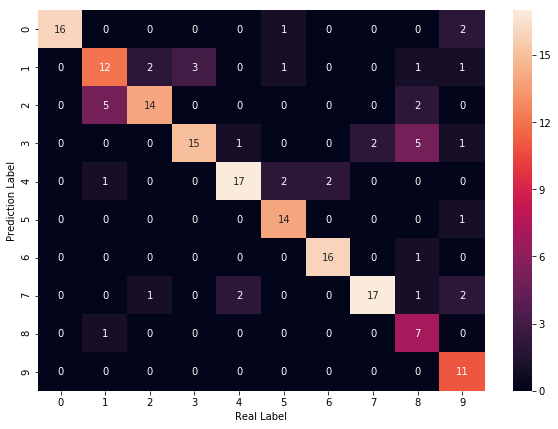

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:11 index:[1] real:5
#1 min_error:12 index:[1 2 3] real:2
#2 min_error:10 index:[3] real:8
#3 min_error:2 index:[0] real:0
#4 min_error:10 index:[4] real:1
#5 min_error:6 index:[7] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:7 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:8 index:[1] real:1
#10 min_error:11 index:[7] real:7
#11 min_error:13 index:[7] real:4
#12 min_error:8 index:[6] real:6
#13 min_error:6 index:[1] real:3
#14 min_error:6 index:[1] real:1
#15 min_error:8 index:[1] real:3
#16 min_error:10 index:[7] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:6 index:[7] real:7
#19 min_error:8 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:3 index:[4] real:4
#22 min_error:6 index:[3] real:3
#23 min_error:8 index:[1] real:1
#24 min_error:2 index:[4] real:4
#25 min_error:6 index:[0] real:0
#26 min_error:10 index:[5] real:5
#27 min_error:7 index:[1 3] real:3
#28 min_error:11 index:[6] real:6
#29 min_error:13 index:[3 9] real:9


In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8217961932247647

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.05555555555555555
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.2388888888888889
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.40555555555555556
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.7
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.7
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.6555555

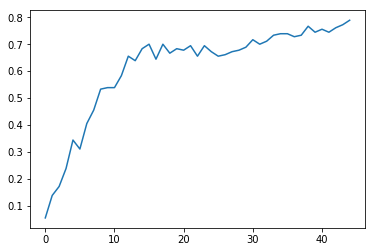

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.05555555555555555,
 0.1388888888888889,
 0.17222222222222222,
 0.2388888888888889,
 0.34444444444444444,
 0.3111111111111111,
 0.40555555555555556,
 0.45555555555555555,
 0.5333333333333333,
 0.5388888888888889,
 0.5388888888888889,
 0.5833333333333334,
 0.6555555555555556,
 0.6388888888888888,
 0.6833333333333333,
 0.7,
 0.6444444444444445,
 0.7,
 0.6666666666666666,
 0.6833333333333333,
 0.6777777777777778,
 0.6944444444444444,
 0.6555555555555556,
 0.6944444444444444,
 0.6722222222222223,
 0.6555555555555556,
 0.6611111111111111,
 0.6722222222222223,
 0.6777777777777778,
 0.6888888888888889,
 0.7166666666666667,
 0.7,
 0.7111111111111111,
 0.7333333333333333,
 0.7388888888888889,
 0.7388888888888889,
 0.7277777777777777,
 0.7333333333333333,
 0.7666666666666667,
 0.7444444444444445,
 0.7555555555555555,
 0.7444444444444445,
 0.7611111111111111,
 0.7722222222222223,
 0.7888888888888889]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8058132343846629
Avg Base Learner:0.8217961932247647
